In [36]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import np_utils
import math
import os
import pylab
import csv
import pymorphy2
import sys
import string
from word2veclite import Word2Vec
import matplotlib.pyplot as plt
import re

Импортируем все необходимые библиотеки

In [37]:
def fix_text(strings_list):
    black_list = [',', '.', '!','?','-',';','\'','(',')','[',']','{','}']
    morph = pymorphy2.MorphAnalyzer()
    for i in range(len(strings_list)):
        for j in range(len(black_list)):
            strings_list[i] = strings_list[i].replace(black_list[j],'')
        temp = strings_list[i].lower().split();
        strings_list[i] = ""
        for j in range(len(temp)):
            p = morph.parse(temp[j])
            if len(p)>0:
                strings_list[i] += p[0].normal_form
            else:
                strings_list[i] += temp[j]
            strings_list[i] += " "
        strings_list[i].strip()
    return strings_list

def csv_dict_writer(path, fieldnames, data):
    """
    Writes a CSV file using DictWriter
    """
    with open(path, "w", newline='') as out_file:
        writer = csv.DictWriter(out_file, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

In [38]:
def saveWeight(weight , W_name):
    with open(W_name, 'w') as f:
        for i in range(len(weight)):
            for j in range(len(weight[i])):
                f.write(str(weight[i][j])+';')
            f.write('\n')
    f.close()

Инициализация функций сохранений данных

In [39]:
files = os.listdir("dictionary")
texts = []
for j in range(len(files)):
    corpus = ""
    with open('dictionary/'+files[j]) as f:
        arr = f.readlines()
    for i in range(len(arr)):
        corpus+=arr[i]
    texts.append(re.sub("^\s+|\n|\r|\s+$", '', corpus))
texts = fix_text(texts)
tokenizer = Tokenizer()
d = {}
for j in range(len(texts)):
    text = texts[j].split()
    tokenizer.fit_on_texts(text)
   
    for i in range(len(text) - 1):
        if text[i + 1] == text[i]: continue
        d[text[i]] = text.count(text[i])
d = [{"Токен":k,"Частота":v} for k, v in sorted(d.items(), reverse=True,key=lambda item: item[1])]
#csv_dict_writer("Word frequency.csv", ["Токен","Частота"], d)

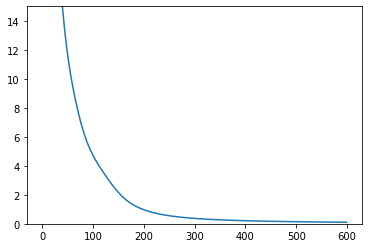

In [40]:
#corpus = texts
corpus = "I like playing football with my friends. All my friends like my ball"
cbow = Word2Vec(method="cbow", corpus=corpus,
                window_size=2, n_hidden=3,
                n_epochs=600, learning_rate=0.1)
W1, W2, loss_vs_epoch = cbow.run()
#saveWeight(W1, 'W1.csv')
#saveWeight(W2, 'W2.csv')
plt.yticks(range(0,24,2))
plt.ylim([0,15])
plt.plot(loss_vs_epoch)
plt.show()

Обучаем нашу нейросеть